In [1]:
%matplotlib notebook
from IPython.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))
from dataclasses import dataclass
import numpy as np
import dyrect as dy
import matplotlib.pyplot as plt
from scipy.integrate import RK45
from scipy.spatial.distance import cdist
import re

(109, 3)


<IPython.core.display.Javascript object>


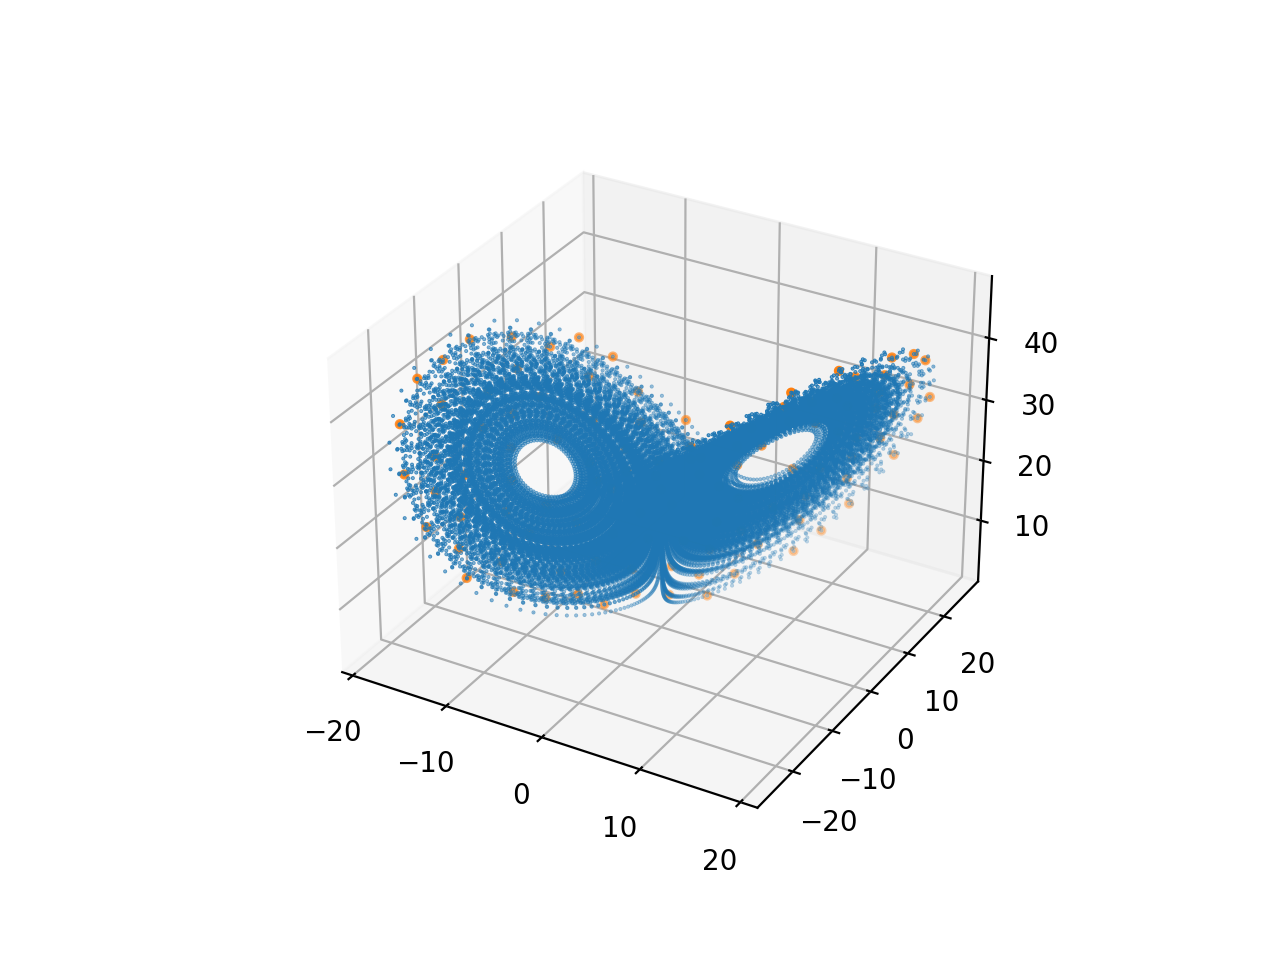

In [2]:
np.random.seed(0)

# generation of time series from the Lorenz attractor
train_points = dy.lorenz_attractor(40000, step=0.01, adaptive_step=False, starting_point=[1.,1.,1.], skip=2000)
test_points = dy.lorenz_attractor(5000, step=0.01, adaptive_step=False, starting_point=[-1.,-1.,1.], skip=2000)

# epsilon net of the training time series, landmarks will be our symbols
eps=4.0
EN = dy.EpsilonNet(eps, 0)
dists = EN.fit(train_points)
lms = EN.landmarks
print(lms.shape)

fig = plt.figure()
ax = fig.add_subplot(projection='3d')
ax.scatter(train_points[:,0], train_points[:,1], train_points[:,2], s=0.2)
ax.scatter(lms[:,0], lms[:,1], lms[:,2], s=7.2)

In [3]:
# method for transforming a discrete trajectory into sequence of symbols, aka sequence of landmarks indices
symbs = dy.symbolization(test_points, lms, eps)
# Seer is a class for comparing new trajectories with the training time series 
seer = dy.Seer(train_points, lms, eps)

In [4]:
t0 = 2000
t1 = t0 + 20
# number of time steps to predict
tpredict = 20

# query: a piece of trajectory taken from a test time series
query = test_points[t0:t1]
# predict seeks for trajectories in a training time series that gives the same symbolization as a given query, 
# it also returns t-symbols (t given by the second argument) that follow the subsequence for every found occurence
prediction = seer.predict(query, tpredict)

# symbolization of the query
print(prediction.past)
# all occurences of the symbolization of the query are summarized here
print("In the training time series the symbol sequence given by query was followed by:")
for future in prediction.futures:
    print(str(future.sequence))
    print("At time steps intervals: " + str(future.occurences))
    print("Number of occurances: " + str(future.counter))

[15 15 15 15 24 24 24 24 24 24 24 24 24 24 24 89 89 89 89 89]
In the training time series the symbol sequence given by query was followed by:
(15, 15, 15, 15, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 89, 89, 89, 89, 89, 17, 17, 17, 17, 17, 51, 51, 51, 91, 91, 21, 21, 92, 92, 92, 60, 60, 60, 86, 0)
At time steps intervals: [(3662, 3702), (17994, 18034), (25342, 25382)]
Number of occurances: 3
(15, 15, 15, 15, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 89, 89, 89, 89, 89, 89, 17, 17, 17, 17, 51, 51, 51, 51, 91, 21, 21, 21, 92, 92, 60, 60, 60, 86, 86)
At time steps intervals: [(7357, 7397), (18376, 18416), (39268, 39308)]
Number of occurances: 3
(15, 15, 15, 15, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 89, 89, 89, 89, 89, 17, 17, 17, 17, 51, 51, 51, 51, 91, 91, 21, 21, 92, 92, 92, 60, 60, 60, 86, 0)
At time steps intervals: [(14982, 15022), (34837, 34877), (39708, 39748)]
Number of occurances: 3
(15, 15, 15, 15, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 89, 89, 89, 89, 89, 89, 17

<IPython.core.display.Javascript object>


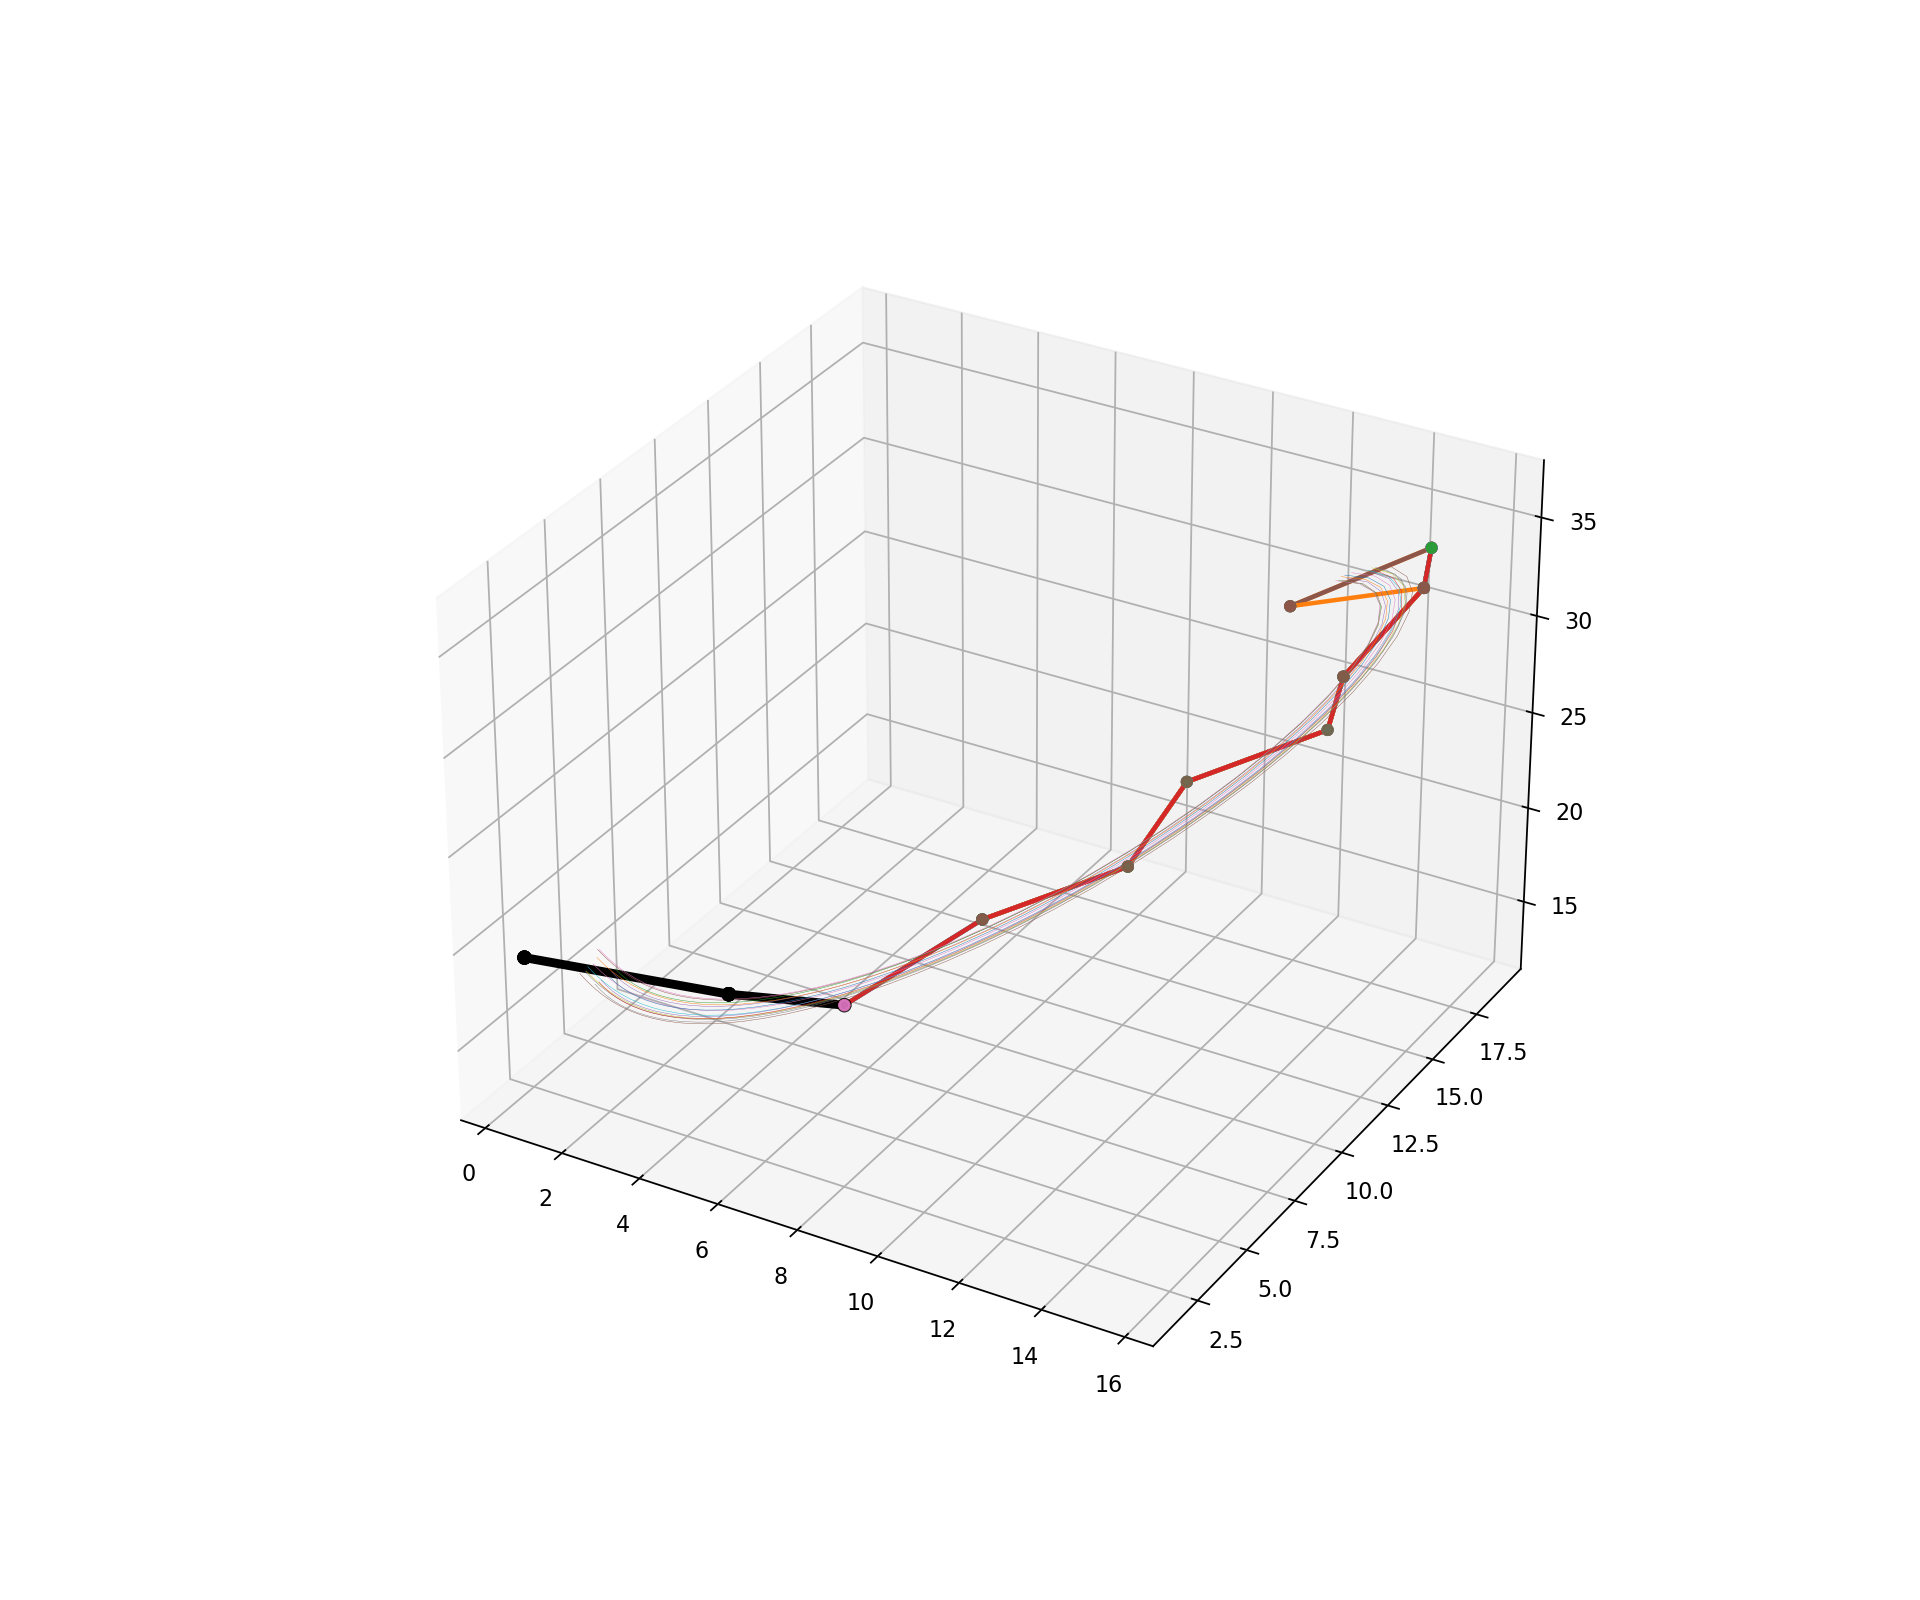

(<Figure size 960x800 with 1 Axes>, <Axes3DSubplot:>)

In [5]:
seer.draw_prediction()